# SVM

In [1]:
import pandas as pd
import numpy as np

X = pd.read_csv('features_set.csv')
y = pd.read_csv('classes_set.csv')

In [2]:
y = y.drop(columns=['Unnamed: 0'])
X = X.drop(columns=['Unnamed: 0'])
y = y.astype(int)
X = X/255.

Splitting training e tesing set

In [3]:
#attenzione, ho preso pochi varoli
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10000, random_state=42, shuffle=True)

In [4]:
X_cv = X_train.head(10000)
y_cv = y_train.head(10000)

Cross Validation

In [7]:
import time
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

model = SVC()
parameters = { 'C': [ 0.05, 0.1, 0.5, 1, 5, 10, 15, 20],
            'kernel': ['linear', 'rbf', 'poli'],
             'degree': [2]}


        
grid_search = GridSearchCV(model, parameters, 
                           cv = 10, n_jobs=5,verbose = 3)

start = time.time()
grid_search.fit(X_cv, y_cv)
end = time.time()
print("The time of execution of above program is :",
      (end-start), "s")
print ("Best Score: {:.3f}".format(grid_search.best_score_) )
print ("Best Params: ", grid_search.best_params_)

Fitting 10 folds for each of 24 candidates, totalling 240 fits


C:\Users\victo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
80 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\victo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\victo\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 255, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\victo\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 315, in _dense_fit
    ) = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx"

The time of execution of above program is : 1580.4488053321838 s
Best Score: 0.967
Best Params:  {'C': 15, 'degree': 2, 'kernel': 'rbf'}


Fit:

In [4]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import time
start = time.time()
svc = SVC(C = 15, kernel = 'rbf')  
svc.fit( X_train, y_train)
end = time.time()
print("The time of execution of above program is :",
      (end-start), "s")

C:\Users\victo\anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The time of execution of above program is : 195.41123843193054 s


Predict on Training Set:

In [6]:
import time
from sklearn.metrics import accuracy_score
# compute accuracy
start = time.time()
y_pred = svc.predict( X_train )
end = time.time()
print("The time of execution of above program is :",
      (end-start), "s")
acc = accuracy_score(y_true=y_train, y_pred=y_pred)
print ("on test Accuracy {:.3f}".format(acc) )


The time of execution of above program is : 499.23384737968445 s
on test Accuracy 1.000


Predict on Testing Set:

In [9]:
import time
from sklearn.metrics import accuracy_score
# compute accuracy
start = time.time()
y_pred = svc.predict( X_test )
end = time.time()
print("The time of execution of above program is :",
      (end-start), "s")
acc = accuracy_score(y_true=y_test, y_pred=y_pred)
print ("on test Accuracy {:.3f}".format(acc) )


The time of execution of above program is : 78.16855454444885 s
on test Accuracy 0.982


Below we visualize some test samples and show their predicted digit value in the title.

In [27]:
from PIL import Image
from matplotlib import cm

def print_image(image):
    myarray = np.reshape(image.to_numpy(), (28,28))
    im = Image.fromarray(np.uint8(cm.gist_earth(myarray)*255))
    width, height = im.size
    new_width  = 300
    new_height = new_width * height / width 
    new_height = 300
    new_width  = new_height * width / height
    img = im.resize((int(new_width), int(new_height)), Image.ANTIALIAS)
    return img

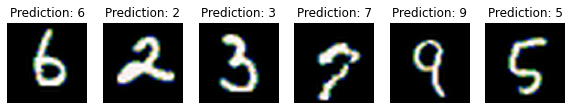

In [29]:
import matplotlib.pyplot as plt
n = 6
_, axes = plt.subplots(nrows=1, ncols=n, figsize=(10, 3))
for ax, i, i in zip(axes, range(n), range(n)):
    ax.set_axis_off()
    image = print_image(X_test.iloc[i+1000])
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {y_pred[i+1000]}")

In [18]:
def missclassify(y_pred, y_test):
    indexes = []
    i = 0
    y = y_test.to_numpy()
    for row in y: 
        if(y_pred[i]!=row):
            indexes.append(i)
        i +=1
    return indexes


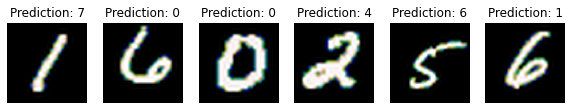

In [19]:
list = missclassify(y_pred, y_test)
n = 6 
_, axes = plt.subplots(nrows=1, ncols=n, figsize=(10, 3)) 
for ax, i, i in zip(axes, list, list): 
    ax.set_axis_off() 
    image = print_image(X.iloc[i]) 
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest") 
    ax.set_title(f"Prediction: {y_pred[i]}")

Confusion Matrix

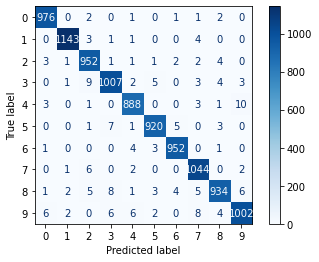

In [22]:
from sklearn.metrics import ConfusionMatrixDisplay
import numpy as np
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred, labels=sorted((y['class'].unique())))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=sorted((y['class'].unique())),
                             )
disp.plot(cmap=plt.cm.Blues)

plt.show()